In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import math

from core.features import Features
from core.preproccesing import normalization, dims_reduction, split_by_blocks
from core.visualization import plot_pca

from core.measurement import (
    Unattacked, 
    LO_Intesity_Attack,
    Calibration_Attack,
    Saturation_Attack,
    Hybrid_Attack,
    Hybrid_Attack2
    )
from core.constants import (
    ATTENUATION_VALUES,
    NUM_SAMPLES,
    NUM_BLOCKS,
    SHOT_NOISE as N0,
)

In [2]:
attenuation_coefs = np.array(ATTENUATION_VALUES)
samples = np.array([int(NUM_SAMPLES * 0.9), int(NUM_SAMPLES * 0.1)])


print(f'ATTENUATION_VALUES: {attenuation_coefs} \t SAMPLES: {samples}')

ATTENUATION_VALUES: [1.    0.001] 	 SAMPLES: [9000000 1000000]



Compute and generate features from unattacked quantum key distribution samples.

This script performs the following steps:
1. Instantiate the Unattacked class with given attenuation coefficients and samples, then obtain quadrature values.
2. Split the unattacked quadrature values into specified number of blocks.
3. Generate features from the split blocks.

Variables:
1. y_unattacked (np.ndarray): Quadrature values from the unattacked samples.
2. blocks_unattacked (np.ndarray): List of blocks obtained from splitting quadrature values.
3. features_unattacked (np.ndarray): DataFrame of generated features from the unattacked blocks.


In [3]:
y_unattacked = Unattacked(attenuation_coefs=attenuation_coefs, samples=samples).quadrature_values()

blocks_unattacked = split_by_blocks(y_unattacked, NUM_BLOCKS)

features_unattacked = Features(blocks_unattacked).generate()

features_unattacked

array([[ 5.67276070e-03,  1.00051448e+00,  9.88274983e+06,
         3.88878839e-01],
       [ 9.59064510e-03,  9.93648408e-01,  9.97041001e+06,
         3.62913310e-01],
       [-4.69613266e-03,  1.02911447e+00,  9.77786954e+06,
         4.01226443e-01],
       ...,
       [-9.99915501e-03,  1.01398792e+00,  1.00476515e+07,
         4.01066604e-01],
       [-6.52007590e-04,  1.00299873e+00,  1.01256506e+07,
         3.95121864e-01],
       [ 7.10164714e-03,  1.01684100e+00,  9.96059484e+06,
         4.19126744e-01]])

The algorithm is similar to the case without attacks

In [4]:
k_loia = 0.95 # lo attenuation coef

y_LOIA = LO_Intesity_Attack(attenuation_coefs=attenuation_coefs, samples=samples, k_loia=k_loia).quadrature_values()

blocks_unattacked = split_by_blocks(y_LOIA, NUM_BLOCKS)

features_LOIA = Features(blocks_unattacked, k_loia).generate()

features_LOIA

array([[-1.83930479e-02,  9.80757137e-01,  9.64542386e+06,
         3.81144194e-01],
       [-1.96806103e-02,  9.73653612e-01,  9.43190719e+06,
         3.92873924e-01],
       [ 3.32209069e-03,  9.77617886e-01,  9.47722896e+06,
         3.78747547e-01],
       ...,
       [-6.40109258e-03,  9.58243243e-01,  9.47021780e+06,
         3.90849297e-01],
       [-1.23214953e-02,  9.80613850e-01,  9.48051773e+06,
         4.01189227e-01],
       [-6.97233786e-03,  9.68755475e-01,  9.37062674e+06,
         4.11064950e-01]])

The algorithm is similar to the case without attacks

In [5]:
k_calib = 1 # default value

y_calib = Calibration_Attack(attenuation_coefs=attenuation_coefs, samples=samples, k_calib=k_calib).quadrature_values()

blocks_calib = split_by_blocks(y_calib, NUM_BLOCKS)

features_calib = Features(blocks_calib, k_calib).generate()

features_calib

array([[ 1.54364650e-02,  8.50802177e-01,  9.98398448e+06,
         3.03539562e-01],
       [-7.64866199e-03,  8.44745117e-01,  1.02509714e+07,
         3.04398166e-01],
       [ 3.71238085e-03,  8.75006062e-01,  1.00768335e+07,
         3.21161602e-01],
       ...,
       [-9.31724353e-03,  8.40546116e-01,  9.93469588e+06,
         3.10825790e-01],
       [ 1.56963767e-02,  8.56555936e-01,  9.93316104e+06,
         3.03535315e-01],
       [-1.30061775e-02,  8.71520580e-01,  1.02333438e+07,
         2.98215798e-01]])

The algorithm is similar to the case without attacks

In [6]:
a_sat = 20 * math.sqrt(N0)
delta_sat = 19.5 * math.sqrt(N0)

y_sat = Saturation_Attack(attenuation_coefs=attenuation_coefs,samples=samples, alpha_sat=a_sat, delta=delta_sat).quadrature_values()

blocks_sat = split_by_blocks(y_sat, NUM_BLOCKS)

features_sat = Features(blocks_sat).generate()

features_sat

array([[1.20554656e+01, 5.22379794e-01, 1.01756833e+07, 2.26229416e-01],
       [1.20449853e+01, 5.41184314e-01, 1.00205452e+07, 2.25633705e-01],
       [1.20511123e+01, 5.26371695e-01, 9.98126249e+06, 2.08600614e-01],
       ...,
       [1.20465446e+01, 5.27242451e-01, 1.00283874e+07, 2.15258107e-01],
       [1.20533183e+01, 5.20271152e-01, 1.00680303e+07, 2.20210482e-01],
       [1.20540223e+01, 5.27118890e-01, 1.02024475e+07, 2.05571109e-01]])

The algorithm is similar to the case without attacks

In [7]:
hyb1_m = Hybrid_Attack(attenuation_coefs=attenuation_coefs,samples=samples)
offset = 0.005
hyb1_coef = math.sqrt(1 / hyb1_m.find_params()[1]) + offset
y_hyb1 = hyb1_m.quadrature_values()

blocks_hyb1 = split_by_blocks(y_hyb1, NUM_BLOCKS)
print(hyb1_coef)
features_hyb1 = Features(blocks_hyb1, hyb1_coef).generate() 

features_hyb1

1.0050000155018526


array([[ 8.49570350e-04,  1.13608408e+00,  1.00098145e+07,
         4.02970525e-01],
       [-1.28264933e-02,  1.11758200e+00,  9.88508660e+06,
         4.07828044e-01],
       [ 1.39715002e-06,  1.11794534e+00,  9.91633786e+06,
         4.02050363e-01],
       ...,
       [-5.40697320e-04,  1.14753448e+00,  9.96102192e+06,
         3.99743856e-01],
       [ 4.26615007e-04,  1.14439467e+00,  9.94123704e+06,
         3.83895782e-01],
       [ 1.11240859e-02,  1.12580592e+00,  9.94708775e+06,
         4.08332830e-01]])

The algorithm is similar to the case without attacks

In [8]:
y_hyb2 = Hybrid_Attack2(attenuation_coefs=attenuation_coefs,samples=samples).quadrature_values()

blocks_hyb2 = split_by_blocks(y_hyb2, NUM_BLOCKS)

features_hyb2 = Features(blocks_hyb2).generate()

features_hyb2

array([[-4.41163419e+01,  1.27318971e+01,  9.95752664e+06,
         3.81474362e-01],
       [-4.41044694e+01,  1.36083712e+01,  9.86824139e+06,
         3.99852989e-01],
       [-4.40676024e+01,  1.35806125e+01,  9.81850089e+06,
         4.18491539e-01],
       ...,
       [-4.40765323e+01,  1.31088269e+01,  1.01053053e+07,
         4.23856045e-01],
       [-4.40840894e+01,  1.32429713e+01,  1.00291622e+07,
         4.04092984e-01],
       [-4.40545387e+01,  1.35150677e+01,  1.00354111e+07,
         4.11167178e-01]])


Create a DataFrame from normalized feature data with corresponding attack labels.

Parameters:
- features (list): List of feature names.
- labels (list): List of attack labels corresponding to different types of attacks.

Returns:
- pandas.DataFrame: DataFrame containing normalized feature data with an additional 'Атака' column.

Explanation:
- 'features' is a list of feature names used as column headers in the DataFrame.
- 'labels' is a list of attack labels, each representing a type of attack.
- 'data' is a numpy array concatenating normalized feature data from different sources.
- 'data_normalized' is the result of applying a normalization function to 'data'.
- 'df' is a pandas DataFrame where each column corresponds to a feature in 'features'.
- The 'Атака' column in 'df' contains attack labels repeated 'NUM_BLOCKS' times to match the length of 'data_normalized'.



In [9]:
features = ['mean', 'var', 'intensity_lo', 'shot_noise']
labels = ['Без атак', 'ИЛО', 'Калиб.', 'Насыщ.', 'Волн.', 'Ослеп.']  

data = np.concatenate([features_unattacked, features_LOIA, features_calib, features_sat, features_hyb1, features_hyb2]) 
data_normalized = normalization(data)

df = pd.DataFrame(data=data_normalized, columns=features)
df['Атака'] = np.repeat(labels, NUM_BLOCKS)
df

,mean,var,intensity_lo,shot_noise,Атака
0,0.785684,0.036433,0.577156,0.713519,Без атак
1,0.785754,0.035926,0.653016,0.626041,Без атак
2,0.785500,0.038546,0.486395,0.755118,Без атак
3,0.785687,0.038085,0.767412,0.705054,Без атак
4,0.785701,0.038225,0.663493,0.824515,Без атак
...,...,...,...,...,...
5995,0.003577,0.908124,0.712650,0.793847,Ослеп.
5996,0.002400,0.944240,0.691161,0.818103,Ослеп.
5997,0.002632,0.931029,0.769752,0.831358,Ослеп.
5998,0.002497,0.940940,0.703859,0.764776,Ослеп.


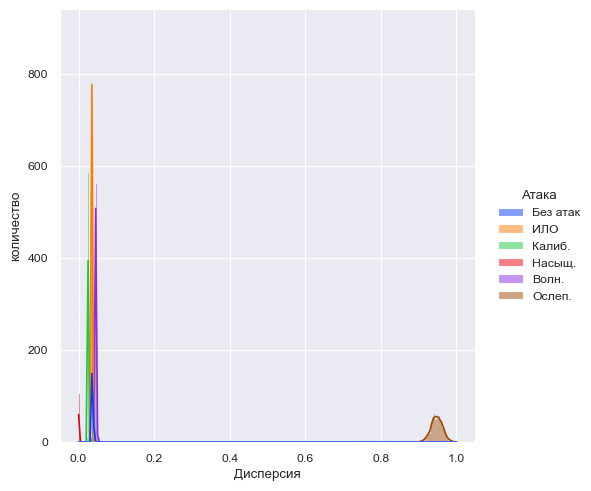

In [10]:
sns.set_style("darkgrid")
sns.set_context("paper")
# g = sns.FacetGrid(df, col='target')
# g.map(sns.histplot, "var")
g = sns.displot(data=df, x='var', hue='Атака', kde=True, palette="bright", legend=True)
g.set_axis_labels('Дисперсия', 'количество')


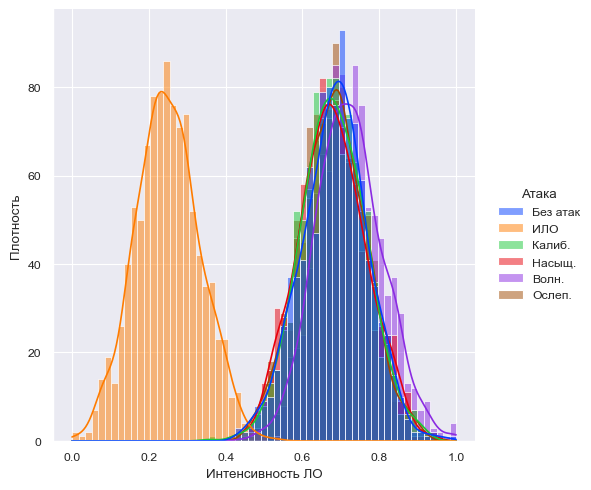

In [30]:
g = sns.displot(data=df, x='intensity_lo', hue='Атака', kde=True, palette="bright",legend=True)
g.set_axis_labels('Интенсивность ЛО', 'Плотность')

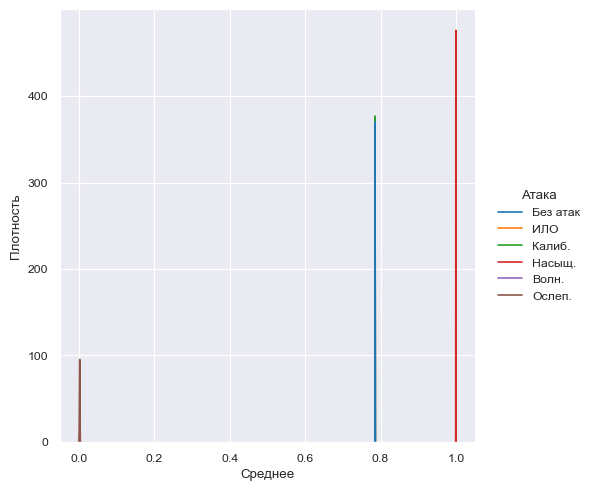

In [12]:
g = sns.displot(data=df, x='mean', hue='Атака', kind='kde', palette="tab10", legend=True)
g.set_axis_labels('Cреднее', 'Плотность')

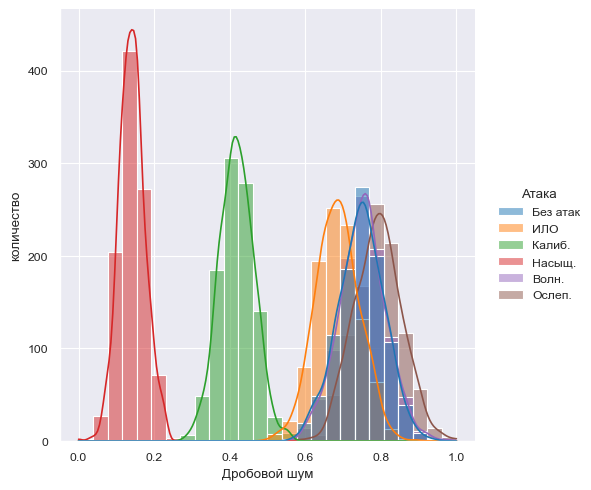

In [13]:

g = sns.displot(data=df, x='shot_noise', hue='Атака', kde=True, palette="tab10", legend=True)
g.set_axis_labels('Дробовой шум', 'количество')


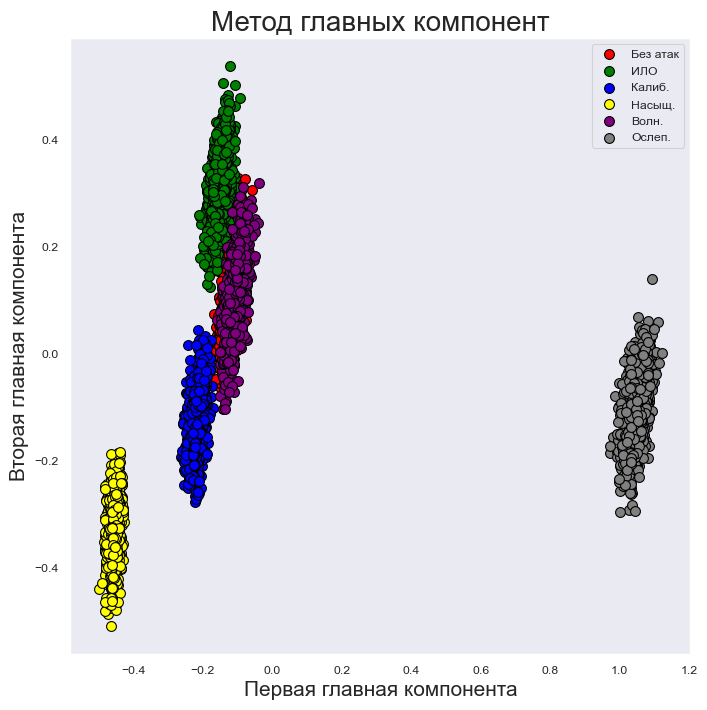

In [14]:
pca_df = dims_reduction(df=df, features=features, dims=2)
plot_pca(pca_df=pca_df, labels=labels)

In [15]:
from sklearn.model_selection import train_test_split

X = df.loc[:, features].values
y = df.loc[:,['Атака']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

print(f"Размер обучающей выборки: {X_train.shape}, размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (4200, 4), размер тестовой выборки: (1800, 4)


In [34]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

model = MultinomialNB()

model.fit(X_train, y_train)


MultinomialNB()

In [35]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred=y_pred, y_true=y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Наивный Байесовский классификатор")
print("Accuracy:", accuray)
print("F1 Score:", f1)

Наивный Байесовский классификатор
Accuracy: 0.8191666666666667
F1 Score: 0.8686513034919316


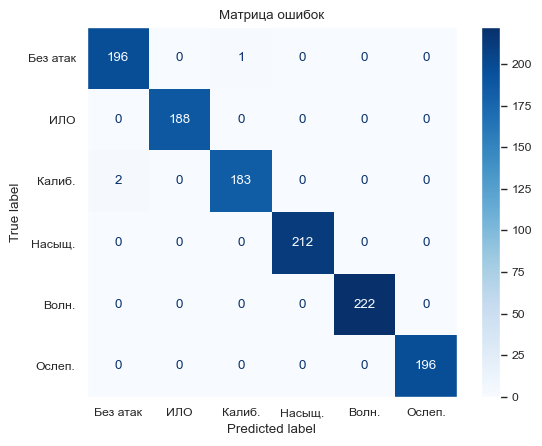

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=0)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')

plt.title('Матрица ошибок')
plt.grid(False)
plt.show()

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

knn_model = knn.fit(X_train, y_train)

knn_predictions = knn.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=knn_predictions)
f1 = f1_score(y_pred=knn_predictions, y_true=y_test, average="weighted")

print("K ближайших соседей")
print(f'Accuracy: {accuracy}')
print("F1 Score:", f1)

K ближайших соседей
Accuracy: 0.9525
F1 Score: 0.9527497459717419


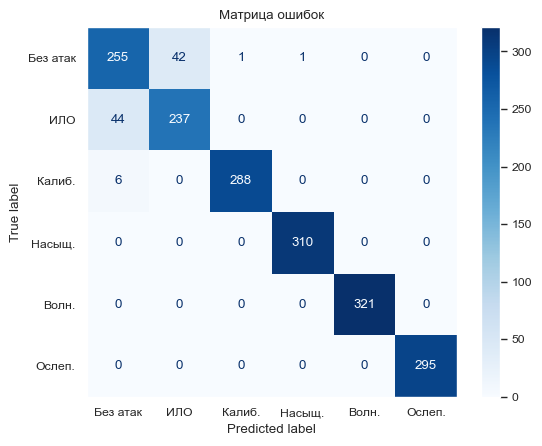

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=0)

cm = confusion_matrix(y_test, knn_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')

plt.title('Матрица ошибок')
plt.grid(False)
plt.show()

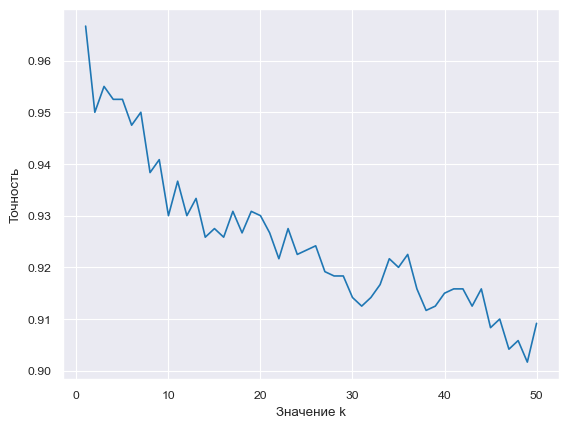

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# k-value range
k_values = range(1, 51, 1) 

data = {'k': [], 'accuracy': []}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    knn_predictions = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, knn_predictions)
    data['k'].append(k)
    data['accuracy'].append(accuracy)


df_k = pd.DataFrame(data)

sns.lineplot(data=df_k, x='k', y='accuracy')
plt.xlabel('Значение k')
plt.ylabel('Точность')
plt.grid(True)
plt.show()


Train a neural network model to classify attack types based on feature data.

Parameters:
- num_classes (int): Number of classes (types of attacks) to classify.
- encoder (LabelBinarizer): Encoder for transforming categorical labels into binary form.
- X (pandas.DataFrame): Features DataFrame excluding the 'Атака' column.
- y (pandas.Series): Categorical labels representing attack types.
- X_train (numpy.ndarray): Features training data.
- X_test (numpy.ndarray): Features test data.
- y_train (numpy.ndarray): Integer-encoded training labels.
- y_test (numpy.ndarray): Integer-encoded test labels.
- model (tensorflow.keras.Sequential): Sequential model for classification.
- history (tensorflow.keras.callbacks.History): Object storing training history.
- test_loss (float): Loss value on the test set.
- test_accuracy (float): Accuracy on the test set.

Explanation:
- 'num_classes' specifies the number of different attack types (classes) to classify.
- 'encoder' is used to convert categorical attack labels into a binary format suitable for model training.
- 'X' represents the features (independent variables) from the DataFrame 'df' excluding the 'Атака' column.
- 'y' is the categorical labels (attack types).
- 'X_train', 'X_test', 'y_train', 'y_test' are the training and test sets split from 'X' and 'y'.
- 'model' is a Sequential neural network model defined with dense layers for classification.
- 'history' stores the training history of the model during fitting.
- 'test_loss' and 'test_accuracy' hold the loss and accuracy metrics evaluated on the test set after training.



In [22]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

num_classes = 6
encoder = LabelBinarizer()

X = df.drop(['Атака'], axis=1)  # df features without labels
y = df['Атака'] # categorial labels
y = encoder.fit_transform(y) # binarized labels
y_int = np.argmax(y, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y_int, test_size=0.2, random_state=41)

model = Sequential([
    Dense(4, input_shape=(X_train.shape[1],)),
    Dense(16, activation='tanh'),
    Dense(6, activation='softmax') 
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=75, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Точность: {test_accuracy}')

Epoch 1/75


C:\Users\Loassar\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2992 - loss: 1.6819 - val_accuracy: 0.6733 - val_loss: 1.4000
Epoch 2/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6677 - loss: 1.3051 - val_accuracy: 0.6675 - val_loss: 1.0213
Epoch 3/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6975 - loss: 0.9490 - val_accuracy: 0.8175 - val_loss: 0.7382
Epoch 4/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8175 - loss: 0.6765 - val_accuracy: 0.8600 - val_loss: 0.5554
Epoch 5/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8447 - loss: 0.5281 - val_accuracy: 0.8742 - val_loss: 0.4473
Epoch 6/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8589 - loss: 0.4318 - val_accuracy: 0.8758 - val_loss: 0.3817
Epoch 7/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8501 - loss: 0.3674 - val_accuracy: 0.8775 - val_loss: 0.3392
Epoch 8/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8534 - loss: 0.3453 - val_accuracy: 0.8767 - val_

In [23]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Точность модели: {test_accuracy}')

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9971 - loss: 0.0447
Точность модели: 0.9958333373069763


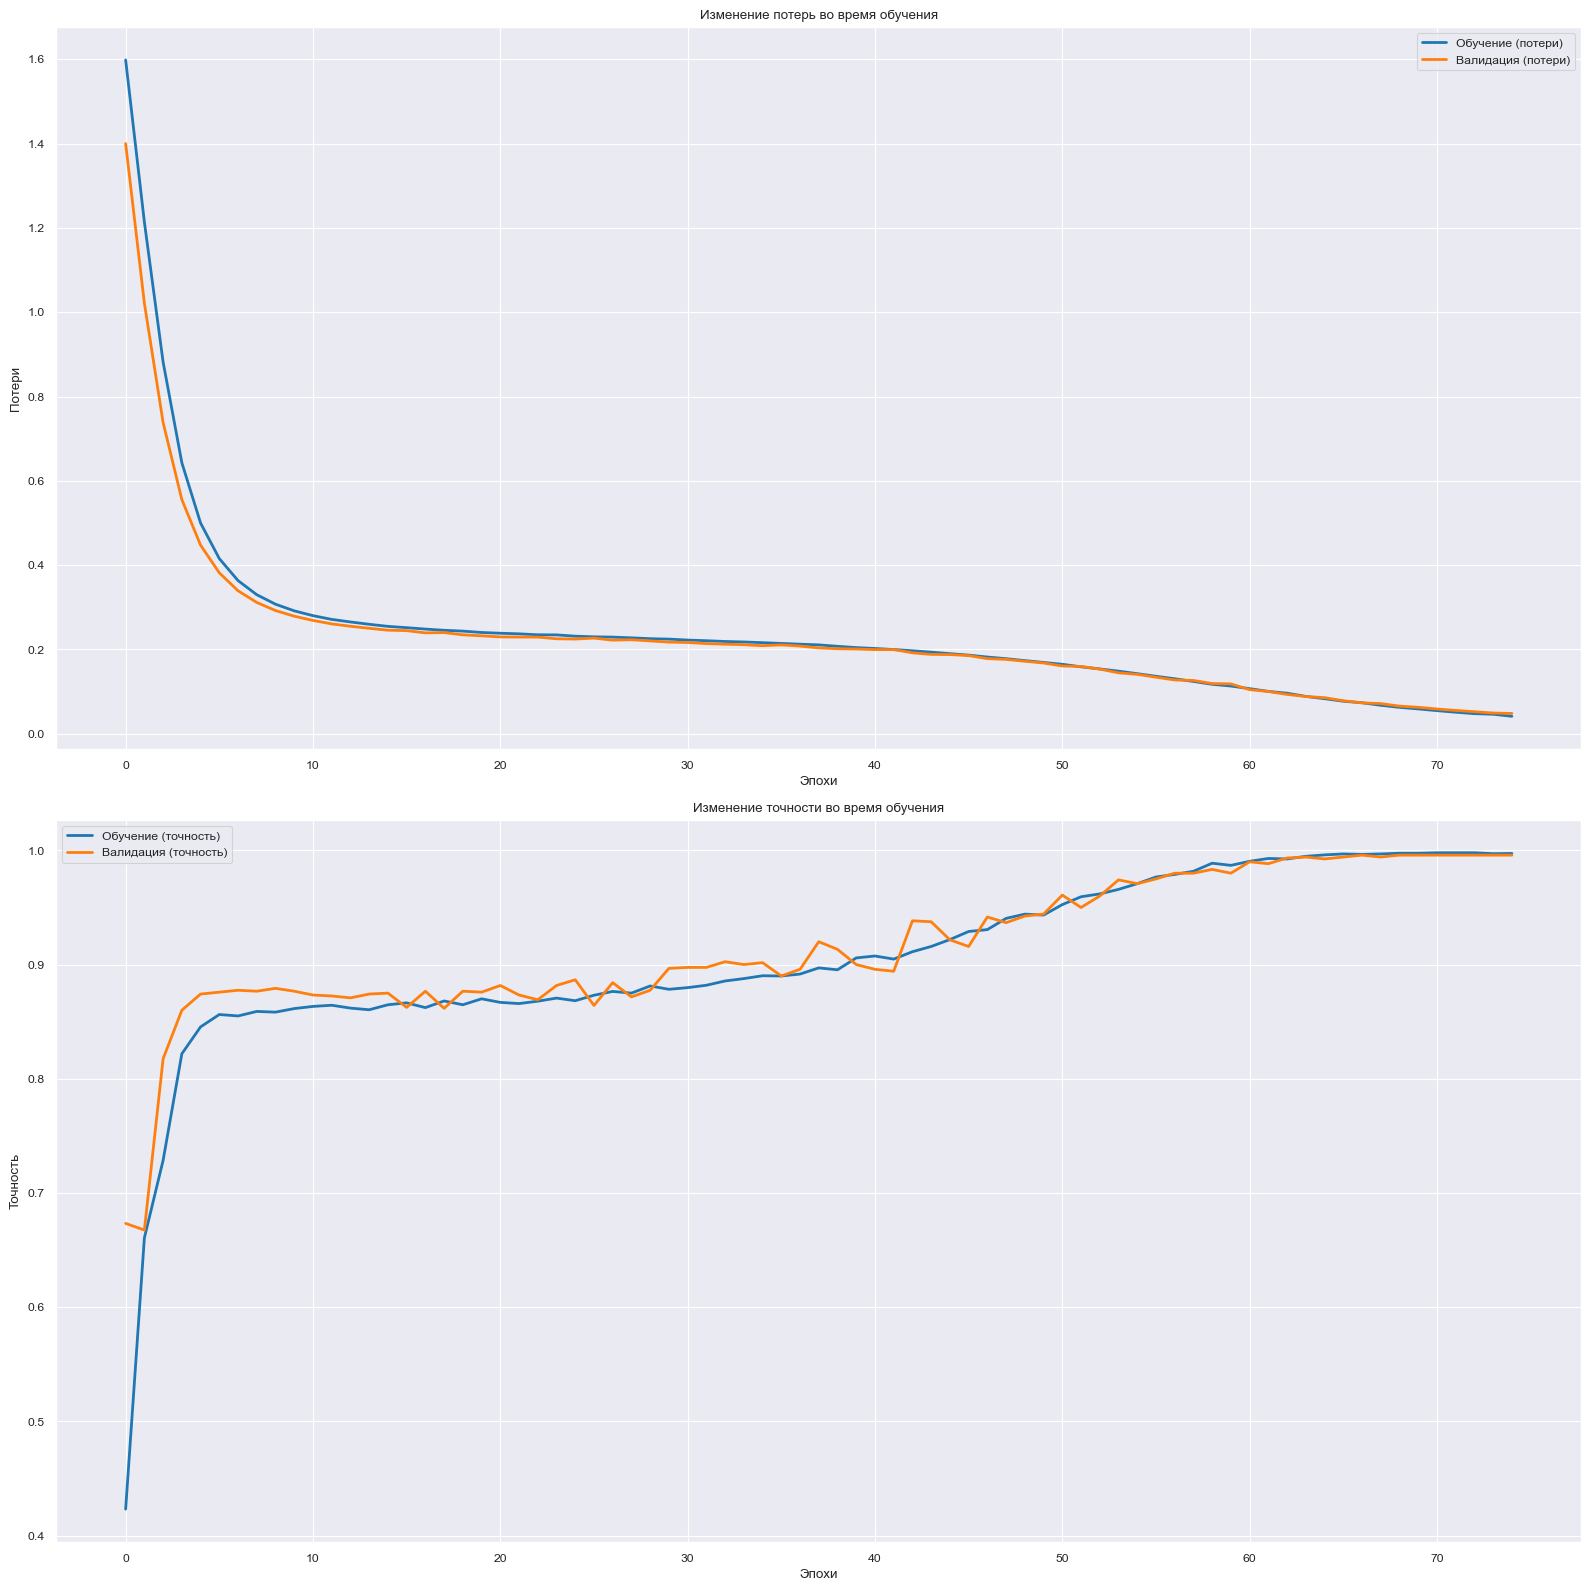

In [24]:
plt.figure(figsize=(16, 8 * 2))

# Loss
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Обучение (потери)', linewidth=2)
plt.plot(history.history['val_loss'], label='Валидация (потери)', linewidth=2)
plt.title('Изменение потерь во время обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.grid(True)

# Accuracy
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Обучение (точность)', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Валидация (точность)', linewidth=2)
plt.title('Изменение точности во время обучения')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


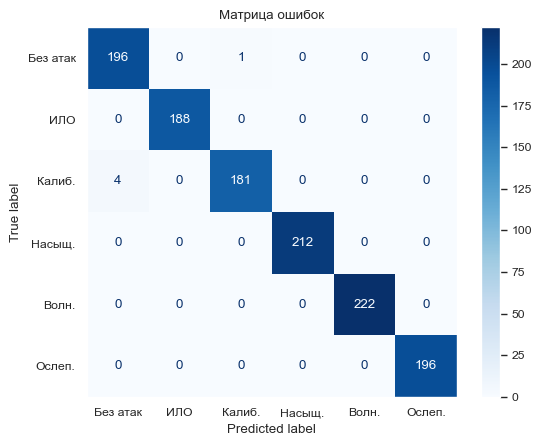

In [25]:
# predictions on the test set
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, predicted_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')

plt.title('Матрица ошибок')
plt.grid(False)
plt.show()